In [1]:
import pandas as pd

## Open database in Excel
file_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Análises\Regressão\Base de dados - Regressão.xlsx"
df = pd.read_excel(file_path, sheet_name="Base de dados")

In [2]:
print(df.columns)

Index(['Codigo', 'Município', 'Emancipation', 'Latitude', 'Longitude',
       'Mesorregião', 'NORDESTE MATO-GROSSENSE', 'NORTE MATO-GROSSENSE',
       'SUDESTE MATO-GROSSENSE', 'SUDOESTE MATO-GROSSENSE', 'Control',
       'Região imediata', 'Região intermediária', 'Ano', 'Production',
       'Productivity', 'PIA', 'Tangará da Serra', 'Diamantino', 'Cáceres',
       'Pontes e Lacerda - Comodoro', 'Mirassol D'oeste', 'Sinop', 'Sorriso',
       'Juína', 'Alta Floresta', 'Peixoto de Azevedo - Guarantã do Norte',
       'Juara', 'Barra do Garças', 'Confresa - Vila Rica', 'Água Boa',
       'Rondonópolis', 'Primavera do Leste', 'Jaciara', 'Control.1',
       'Int - Barra do Garças', 'Int - Cáceres', 'Int - Rondonópolis',
       'Int - Sinop', 'year1980', 'year1985', 'year1995', 'year2006',
       'Control.2', 'Occupied People', 'Temporary Tillage',
       'Permanently Tillage', 'Total Tillage', 'Productivity Land Unitilized',
       'Planted Pastages', 'Natural Pastages', 'Total Pastages',
 

In [3]:
##Cleaning dataframe
columns_to_drop = [
    'Emancipation',
    'Mesorregião',
    'NORDESTE MATO-GROSSENSE',
    'NORTE MATO-GROSSENSE',
    'SUDESTE MATO-GROSSENSE',
    'SUDOESTE MATO-GROSSENSE',
    'Control',
    'Região intermediária',
    'Tangará da Serra',
    'Diamantino',
    'Cáceres',
    "Pontes e Lacerda - Comodoro",
    "Mirassol D'oeste",
    'Sinop',
    'Sorriso',
    'Juína',
    'Alta Floresta',
    'Peixoto de Azevedo - Guarantã do Norte',
    'Juara',
    'Barra do Garças',
    'Confresa - Vila Rica',
    'Água Boa',
    'Rondonópolis',
    'Primavera do Leste',
    'Jaciara',
    'Control.1',
    'Int - Barra do Garças',
    'Int - Cáceres',
    'Int - Rondonópolis',
    'Int - Sinop',
    'year1980',
    'year1985',
    'year1995',
    'year2006',
    'Control.2',
    'Value of land'
]
df.drop(columns=columns_to_drop, inplace=True)
print(df.columns)


Index(['Codigo', 'Município', 'Latitude', 'Longitude', 'Região imediata',
       'Ano', 'Production', 'Productivity', 'PIA', 'Occupied People',
       'Temporary Tillage', 'Permanently Tillage', 'Total Tillage',
       'Productivity Land Unitilized', 'Planted Pastages', 'Natural Pastages',
       'Total Pastages', 'Annual Investment ', 'Capital Stock', 'TFP'],
      dtype='object')


In [4]:
## Grouping by year and region
sum_columns = [
    'Production', 'Productivity', 'PIA', 'Occupied People',
    'Temporary Tillage', 'Permanently Tillage', 'Total Tillage',
    'Productivity Land Unitilized', 'Planted Pastages', 'Natural Pastages',
    'Total Pastages', 'Annual Investment ', 'Capital Stock', 'TFP'
]

grouped_df = df.groupby(['Região imediata', 'Ano']).agg(
    {**{col: 'sum' for col in sum_columns}}  # Sum numeric cols
).reset_index()

grouped_df

,Região imediata,Ano,Production,Productivity,PIA,Occupied People,Temporary Tillage,Permanently Tillage,Total Tillage,Productivity Land Unitilized,Planted Pastages,Natural Pastages,Total Pastages,Annual Investment,Capital Stock,TFP
0,Alta Floresta,1975,0.000000,0.000000,0.000000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000e+00,0.000000
1,Alta Floresta,1980,0.000000,0.000000,18049.000000,11596,7413.483,15852.623,23266.106,349.355,44890.531,120195.795,165086.326,52308.356668,3.364311e+05,-41315.106000
2,Alta Floresta,1985,128408.234004,3.960525,21461.704270,11223,15949.799,16472.227,32422.026,3627.383,85107.482,149684.209,234791.691,67265.537138,5.884708e+05,74524.503734
3,Alta Floresta,1995,74856.088993,11.434542,74854.530523,21179,24983.043,19321.215,44304.258,21374.593,731387.161,170975.163,902362.324,56457.551702,0.000000e+00,-44302.699530
4,Alta Floresta,2006,52160.128531,23.746945,77919.984019,21344,11738.000,11299.000,23037.000,0.000,1000491.000,121360.000,1121851.000,82911.363653,1.099247e+05,-48796.855488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Água Boa,1975,0.000000,0.000000,0.000000,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000,0.000000e+00,0.000000
86,Água Boa,1980,0.000000,0.000000,15871.000000,4584,123563.570,621.760,124185.330,276902.868,191371.279,649450.810,840822.089,69440.744396,5.997831e+05,-140056.330000
87,Água Boa,1985,133672.067650,2.614677,16564.294542,9813,100709.356,2355.914,103065.270,264532.560,393203.480,390644.902,783848.382,113223.772523,1.165781e+06,14042.503107
88,Água Boa,1995,180016.338395,17.837989,38153.706769,14317,91471.177,8613.143,100084.320,98712.444,1384495.049,986099.131,2370594.180,106549.933964,0.000000e+00,41778.311626


In [5]:
# Keep only rows where 'Production' is NOT zero
filtered_df = grouped_df[grouped_df['Production'] != 0]
filtered_df

,Região imediata,Ano,Production,Productivity,PIA,Occupied People,Temporary Tillage,Permanently Tillage,Total Tillage,Productivity Land Unitilized,Planted Pastages,Natural Pastages,Total Pastages,Annual Investment,Capital Stock,TFP
2,Alta Floresta,1985,1.284082e+05,3.960525,21461.704270,11223,15949.799,16472.227,32422.026,3627.383,85107.482,149684.209,234791.691,67265.537138,5.884708e+05,74524.503734
3,Alta Floresta,1995,7.485609e+04,11.434542,74854.530523,21179,24983.043,19321.215,44304.258,21374.593,731387.161,170975.163,902362.324,56457.551702,0.000000e+00,-44302.699530
4,Alta Floresta,2006,5.216013e+04,23.746945,77919.984019,21344,11738.000,11299.000,23037.000,0.000,1000491.000,121360.000,1121851.000,82911.363653,1.099247e+05,-48796.855488
5,Barra do Garças,1975,2.639898e+05,14.087594,22896.503996,3254,70221.968,1596.699,71818.667,207148.472,0.000,0.000,0.000,160784.519091,1.061836e+06,169274.612536
6,Barra do Garças,1980,4.086768e+05,9.666540,81801.000000,20821,148892.569,4887.366,153779.935,627732.400,509306.117,1179620.930,1688927.047,214249.201976,1.540708e+06,173095.829490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Tangará da Serra,1995,8.038029e+05,13.966668,51465.058815,26981,613278.219,6588.045,619866.264,144698.536,1108423.029,287765.638,1396188.667,73756.024760,0.000000e+00,132471.567931
84,Tangará da Serra,2006,1.967400e+06,23.036633,86914.741915,13250,887473.000,14029.000,901502.000,0.000,959587.000,258028.000,1217615.000,91084.622948,1.776293e+05,978983.501899
87,Água Boa,1985,1.336721e+05,2.614677,16564.294542,9813,100709.356,2355.914,103065.270,264532.560,393203.480,390644.902,783848.382,113223.772523,1.165781e+06,14042.503107
88,Água Boa,1995,1.800163e+05,17.837989,38153.706769,14317,91471.177,8613.143,100084.320,98712.444,1384495.049,986099.131,2370594.180,106549.933964,0.000000e+00,41778.311626


In [6]:
##Define the regions and their corresponding colors and markers
region_styles = {
    'Alta Floresta': ('blue', 'o'),
    'Barra do Garças': ('green', 's'),
    'Confresa - Vila Rica': ('red', 'd'),
    'Cuiabá': ('purple', '*'),
    'Cáceres': ('orange', 'x'),
    'Diamantino': ('brown', '^'),  
    'Jaciara': ('pink', 'v'),       
    'Juara': ('gray', '<'),         
    'Juína': ('olive', '>'),        
    'Mirassol D\'oeste': ('cyan', 's'),  
    'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),  
    'Pontes e Lacerda - Comodoro': ('yellow', 'd'),  
    'Primavera do Leste': ('teal', '^'),  
    'Rondonópolis': ('lime', 'v'),      
    'Sinop': ('darkviolet', '<'),      
    'Sorriso': ('salmon', '>'),         
    'Tangará da Serra': ('gold', '*'),  
    'Água Boa': ('tan', 's')           
}

c:\Users\daves\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


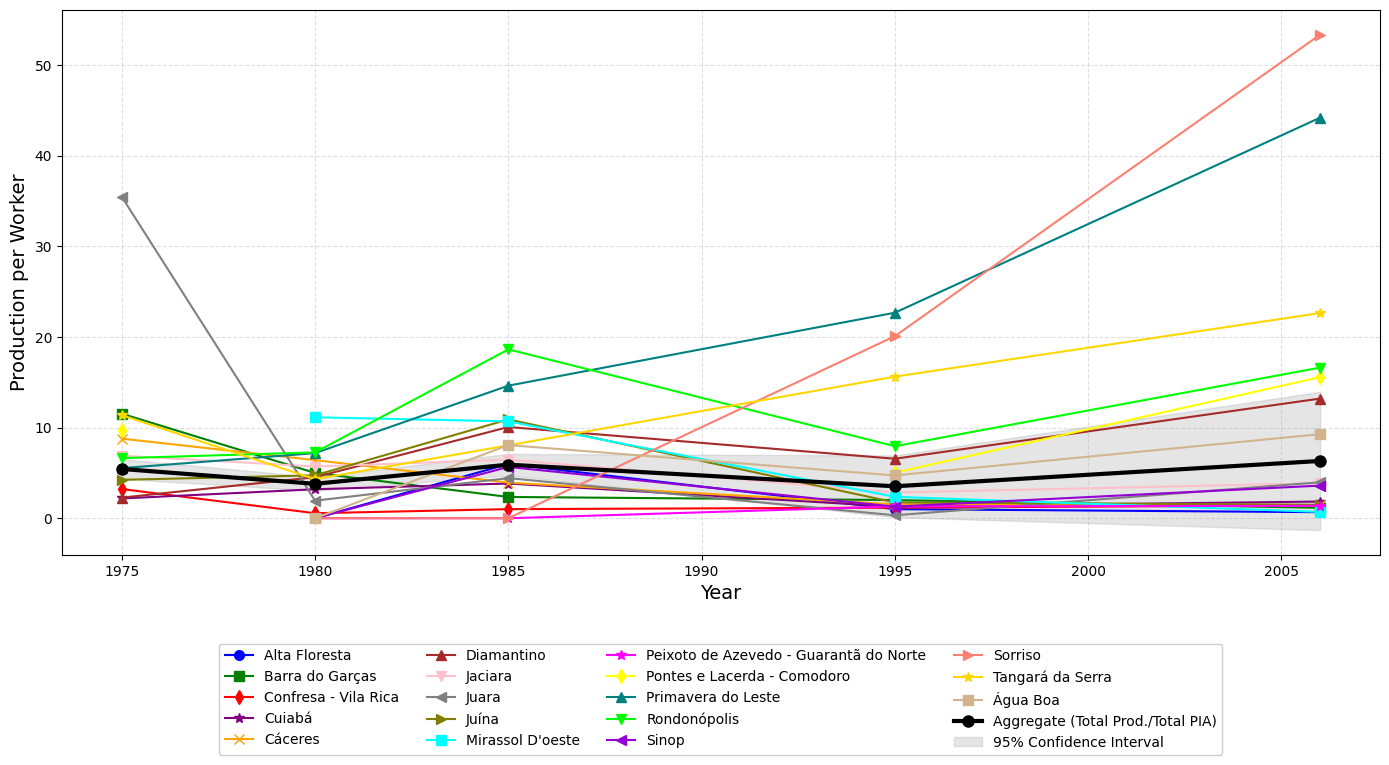


Confidence Interval Values:
Year 1975: CI = 1.0867, Aggregate = 5.4337
Year 1980: CI = 0.7595, Aggregate = 3.7976
Year 1985: CI = 1.1822, Aggregate = 5.9111
Year 1995: CI = 3.4033, Aggregate = 3.5240
Year 2006: CI = 7.6339, Aggregate = 6.3188

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per worker.jpg


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate Production per Worker for each region
grouped_df['Production_per_worker'] = grouped_df['Production'] / grouped_df['PIA']

# Calculate Aggregate (sum of Production / sum of PIA)
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'PIA': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_worker'] = annual_totals['Production'] / annual_totals['PIA']

# Calculate confidence intervals (95%) - improved method
conf_intervals = []

for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_worker']
    n = len(year_data)
    
    if n > 1:
        # Standard method when we have multiple data points
        se = stats.sem(year_data)  # Standard error
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)  # 95% CI
    else:
        # For single data point years, use a different approach
        # We'll use the average CI from other years or a percentage of the value
        if len(conf_intervals) > 0:
            # Use average of previously calculated CIs if available
            ci = np.mean([c for c in conf_intervals if not np.isnan(c)])
        else:
            # Or use a percentage of the value as fallback
            ci = 0.2 * year_data.iloc[0] if not year_data.empty else 0
            
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create plot
plt.figure(figsize=(14, 8))

# Get unique regions
regions = sorted(grouped_df['Região imediata'].unique())

# Plot each region with its defined style from region_styles dictionary
for region in regions:
    region_data = grouped_df[grouped_df['Região imediata'] == region]
    
    # Get color and marker from region_styles, or use defaults if not found
    if region in region_styles:
        color, marker = region_styles[region]
    else:
        color, marker = 'gray', 'o'  # Default for any region not in the dictionary
        
    plt.plot(
        region_data['Ano'], 
        region_data['Production_per_worker'], 
        color=color, linestyle='-', linewidth=1.5,
        marker=marker, markersize=7,
        label=region
    )

# Plot Aggregate with confidence interval
plt.plot(
    annual_totals['Ano'], 
    annual_totals['Aggregate_Production_per_worker'],
    color='black', linestyle='-', linewidth=3,
    marker='o', markersize=8,
    label='Aggregate (Total Prod./Total PIA)'
)

# Make sure all confidence intervals are valid numbers
annual_totals['Confidence_Interval'] = annual_totals['Confidence_Interval'].fillna(
    annual_totals['Aggregate_Production_per_worker'] * 0.2  # 20% of value as fallback
)

plt.fill_between(
    annual_totals['Ano'],
    annual_totals['Aggregate_Production_per_worker'] - annual_totals['Confidence_Interval'],
    annual_totals['Aggregate_Production_per_worker'] + annual_totals['Confidence_Interval'],
    color='darkgray', alpha=0.3,
    label='95% Confidence Interval'
)

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production per Worker', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# Create legend with all regions
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for the legend

# Save the figure to the specified path
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per worker.jpg"
plt.savefig(save_path, dpi=1200, bbox_inches='tight')  # High resolution with tight bounding box

# Show the plot
plt.show()

# Print info about confidence intervals for transparency
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_worker']:.4f}")

print(f"\nPlot saved to: {save_path}")

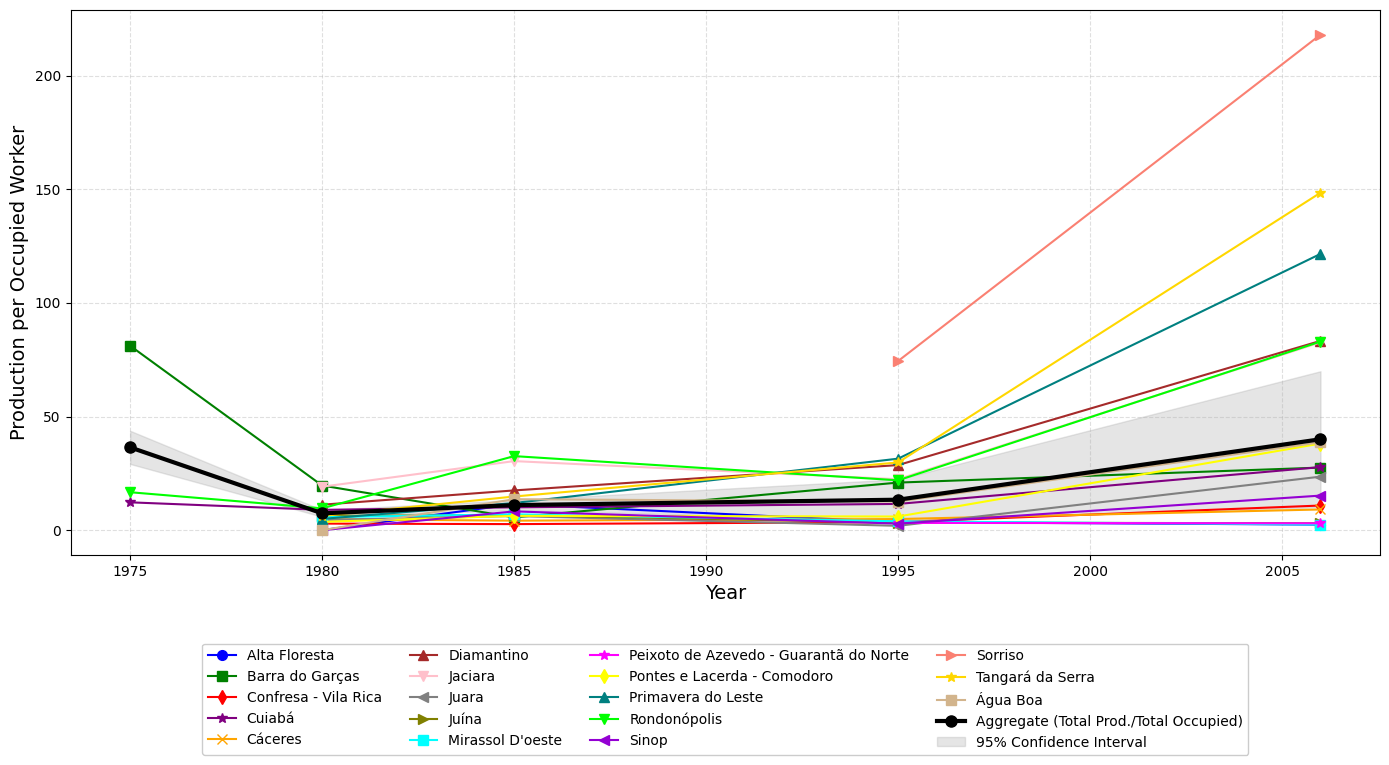


Confidence Interval Values:
Year 1975: CI = 7.2846, Aggregate = 36.4231
Year 1980: CI = 1.4789, Aggregate = 7.3944
Year 1985: CI = 2.2038, Aggregate = 11.0188
Year 1995: CI = 8.9540, Aggregate = 13.3937
Year 2006: CI = 29.9239, Aggregate = 39.9913

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per occupied.jpg


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate Production per Occupied Worker for each region
grouped_df['Production_per_occupied'] = grouped_df['Production'] / grouped_df['Occupied People']

# Calculate Aggregate (sum of Production / sum of Occupied People)
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'Occupied People': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_occupied'] = annual_totals['Production'] / annual_totals['Occupied People']

# Calculate confidence intervals (95%) - improved method
conf_intervals = []

for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_occupied']
    n = len(year_data)
    
    if n > 1:
        # Standard method when we have multiple data points
        se = stats.sem(year_data)  # Standard error
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)  # 95% CI
    else:
        # For single data point years, use a different approach
        # We'll use the average CI from other years or a percentage of the value
        if len(conf_intervals) > 0:
            # Use average of previously calculated CIs if available
            ci = np.mean([c for c in conf_intervals if not np.isnan(c)])
        else:
            # Or use a percentage of the value as fallback
            ci = 0.2 * year_data.iloc[0] if not year_data.empty else 0
            
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create plot
plt.figure(figsize=(14, 8))

# Get unique regions
regions = sorted(grouped_df['Região imediata'].unique())

# Plot each region with its defined style from region_styles dictionary
for region in regions:
    region_data = grouped_df[grouped_df['Região imediata'] == region]
    
    # Get color and marker from region_styles, or use defaults if not found
    if region in region_styles:
        color, marker = region_styles[region]
    else:
        color, marker = 'gray', 'o'  # Default for any region not in the dictionary
        
    plt.plot(
        region_data['Ano'], 
        region_data['Production_per_occupied'], 
        color=color, linestyle='-', linewidth=1.5,
        marker=marker, markersize=7,
        label=region
    )

# Plot Aggregate with confidence interval
plt.plot(
    annual_totals['Ano'], 
    annual_totals['Aggregate_Production_per_occupied'],
    color='black', linestyle='-', linewidth=3,
    marker='o', markersize=8,
    label='Aggregate (Total Prod./Total Occupied)'
)

# Make sure all confidence intervals are valid numbers
annual_totals['Confidence_Interval'] = annual_totals['Confidence_Interval'].fillna(
    annual_totals['Aggregate_Production_per_occupied'] * 0.2  # 20% of value as fallback
)

plt.fill_between(
    annual_totals['Ano'],
    annual_totals['Aggregate_Production_per_occupied'] - annual_totals['Confidence_Interval'],
    annual_totals['Aggregate_Production_per_occupied'] + annual_totals['Confidence_Interval'],
    color='darkgray', alpha=0.3,
    label='95% Confidence Interval'
)

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production per Occupied Worker', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)


# Create legend with all regions
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for the legend

# Save the figure to the specified path
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per occupied.jpg"
plt.savefig(save_path, dpi=1200, bbox_inches='tight')  # High resolution with tight bounding box

# Show the plot
plt.show()

# Print info about confidence intervals for transparency
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_occupied']:.4f}")

print(f"\nPlot saved to: {save_path}")

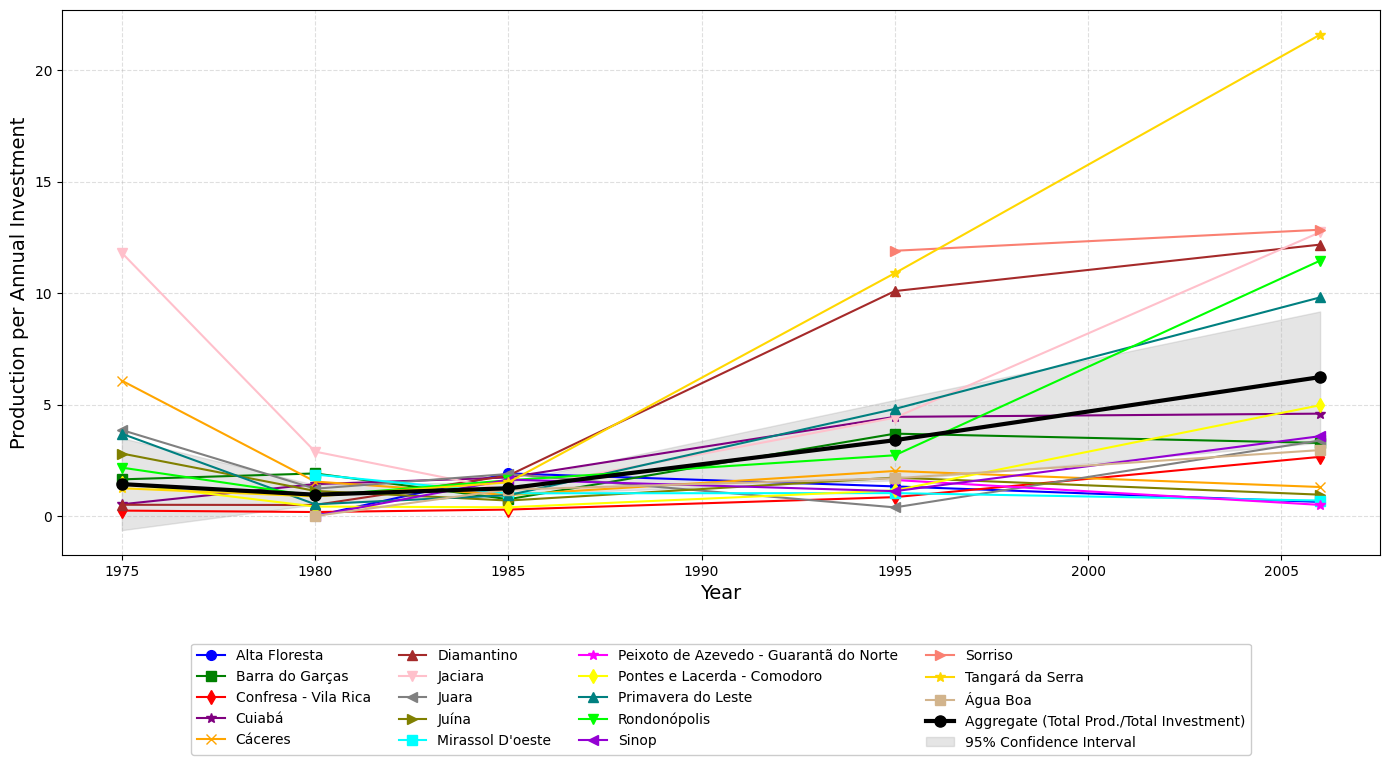


Confidence Interval Values:
Year 1975: CI = 2.0655, Aggregate = 1.4281
Year 1980: CI = 0.4387, Aggregate = 0.9540
Year 1985: CI = 0.2819, Aggregate = 1.2411
Year 1995: CI = 1.8029, Aggregate = 3.3998
Year 2006: CI = 2.9451, Aggregate = 6.2310

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per investment.jpg


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate Production per Annual Investment for each region
# Handle potential zeros in Annual Investment by replacing with NaN
grouped_df['Production_per_investment'] = grouped_df['Production'] / grouped_df['Annual Investment '].replace(0, np.nan)

# Calculate Aggregate (sum of Production / sum of Annual Investment)
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'Annual Investment ': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_investment'] = annual_totals['Production'] / annual_totals['Annual Investment ']

# Calculate confidence intervals (95%) - improved method
conf_intervals = []

for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_investment']
    # Filter out NaN values for CI calculation
    year_data = year_data.dropna()
    n = len(year_data)
    
    if n > 1:
        # Standard method when we have multiple data points
        se = stats.sem(year_data)  # Standard error
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)  # 95% CI
    else:
        # For single data point years, use a different approach
        # We'll use the average CI from other years or a percentage of the value
        if len(conf_intervals) > 0:
            # Use average of previously calculated CIs if available
            ci = np.mean([c for c in conf_intervals if not np.isnan(c)])
        else:
            # Or use a percentage of the value as fallback
            ci = 0.2 * year_data.iloc[0] if not year_data.empty else 0
            
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create plot
plt.figure(figsize=(14, 8))

# Get unique regions
regions = sorted(grouped_df['Região imediata'].unique())

# Plot each region with its defined style from region_styles dictionary
for region in regions:
    region_data = grouped_df[grouped_df['Região imediata'] == region]
    
    # Get color and marker from region_styles, or use defaults if not found
    if region in region_styles:
        color, marker = region_styles[region]
    else:
        color, marker = 'gray', 'o'  # Default for any region not in the dictionary
        
    plt.plot(
        region_data['Ano'], 
        region_data['Production_per_investment'], 
        color=color, linestyle='-', linewidth=1.5,
        marker=marker, markersize=7,
        label=region
    )

# Plot Aggregate with confidence interval
plt.plot(
    annual_totals['Ano'], 
    annual_totals['Aggregate_Production_per_investment'],
    color='black', linestyle='-', linewidth=3,
    marker='o', markersize=8,
    label='Aggregate (Total Prod./Total Investment)'
)

# Make sure all confidence intervals are valid numbers
annual_totals['Confidence_Interval'] = annual_totals['Confidence_Interval'].fillna(
    annual_totals['Aggregate_Production_per_investment'] * 0.2  # 20% of value as fallback
)

plt.fill_between(
    annual_totals['Ano'],
    annual_totals['Aggregate_Production_per_investment'] - annual_totals['Confidence_Interval'],
    annual_totals['Aggregate_Production_per_investment'] + annual_totals['Confidence_Interval'],
    color='darkgray', alpha=0.3,
    label='95% Confidence Interval'
)

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production per Annual Investment', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# Create legend with all regions
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for the legend

# Save the figure to the specified path
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per investment.jpg"
plt.savefig(save_path, dpi=1200, bbox_inches='tight')  # High resolution with tight bounding box

# Show the plot
plt.show()

# Print info about confidence intervals for transparency
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_investment']:.4f}")

print(f"\nPlot saved to: {save_path}")

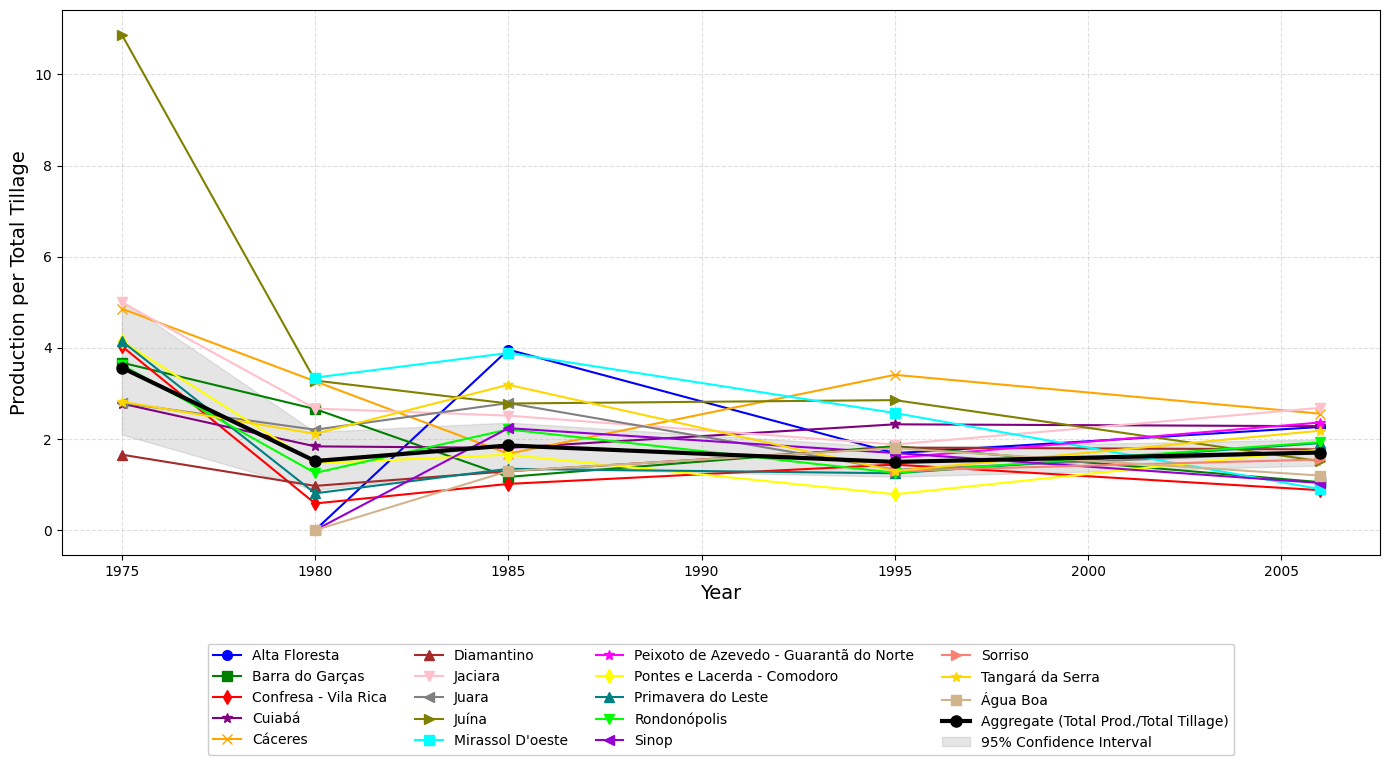


Confidence Interval Values:
Year 1975: CI = 1.4666, Aggregate = 3.5658
Year 1980: CI = 0.6370, Aggregate = 1.5166
Year 1985: CI = 0.5011, Aggregate = 1.8588
Year 1995: CI = 0.3217, Aggregate = 1.4965
Year 2006: CI = 0.2846, Aggregate = 1.7027

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per tillage.jpg


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Calculate Production per Total Tillage for each region
# Handle potential zeros in Total Tillage by replacing with NaN
grouped_df['Production_per_tillage'] = grouped_df['Production'] / grouped_df['Total Tillage'].replace(0, np.nan)

# Calculate Aggregate (sum of Production / sum of Total Tillage)
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'Total Tillage': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_tillage'] = annual_totals['Production'] / annual_totals['Total Tillage']

# Calculate confidence intervals (95%) - improved method
conf_intervals = []

for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_tillage']
    # Filter out NaN values for CI calculation
    year_data = year_data.dropna()
    n = len(year_data)
    
    if n > 1:
        # Standard method when we have multiple data points
        se = stats.sem(year_data)  # Standard error
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)  # 95% CI
    else:
        # For single data point years, use a different approach
        # We'll use the average CI from other years or a percentage of the value
        if len(conf_intervals) > 0:
            # Use average of previously calculated CIs if available
            ci = np.mean([c for c in conf_intervals if not np.isnan(c)])
        else:
            # Or use a percentage of the value as fallback
            ci = 0.2 * year_data.iloc[0] if not year_data.empty else 0
            
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create plot
plt.figure(figsize=(14, 8))

# Get unique regions
regions = sorted(grouped_df['Região imediata'].unique())

# Plot each region with its defined style from region_styles dictionary
for region in regions:
    region_data = grouped_df[grouped_df['Região imediata'] == region]
    
    # Get color and marker from region_styles, or use defaults if not found
    if region in region_styles:
        color, marker = region_styles[region]
    else:
        color, marker = 'gray', 'o'  # Default for any region not in the dictionary
        
    plt.plot(
        region_data['Ano'], 
        region_data['Production_per_tillage'], 
        color=color, linestyle='-', linewidth=1.5,
        marker=marker, markersize=7,
        label=region
    )

# Plot Aggregate with confidence interval
plt.plot(
    annual_totals['Ano'], 
    annual_totals['Aggregate_Production_per_tillage'],
    color='black', linestyle='-', linewidth=3,
    marker='o', markersize=8,
    label='Aggregate (Total Prod./Total Tillage)'
)

# Make sure all confidence intervals are valid numbers
annual_totals['Confidence_Interval'] = annual_totals['Confidence_Interval'].fillna(
    annual_totals['Aggregate_Production_per_tillage'] * 0.2  # 20% of value as fallback
)

plt.fill_between(
    annual_totals['Ano'],
    annual_totals['Aggregate_Production_per_tillage'] - annual_totals['Confidence_Interval'],
    annual_totals['Aggregate_Production_per_tillage'] + annual_totals['Confidence_Interval'],
    color='darkgray', alpha=0.3,
    label='95% Confidence Interval'
)

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production per Total Tillage', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# Create legend with all regions
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)  # Make room for the legend

# Save the figure to the specified path
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production per tillage.jpg"
plt.savefig(save_path, dpi=1200, bbox_inches='tight')  # High resolution with tight bounding box

# Show the plot
plt.show()

# Print info about confidence intervals for transparency
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_tillage']:.4f}")

print(f"\nPlot saved to: {save_path}")

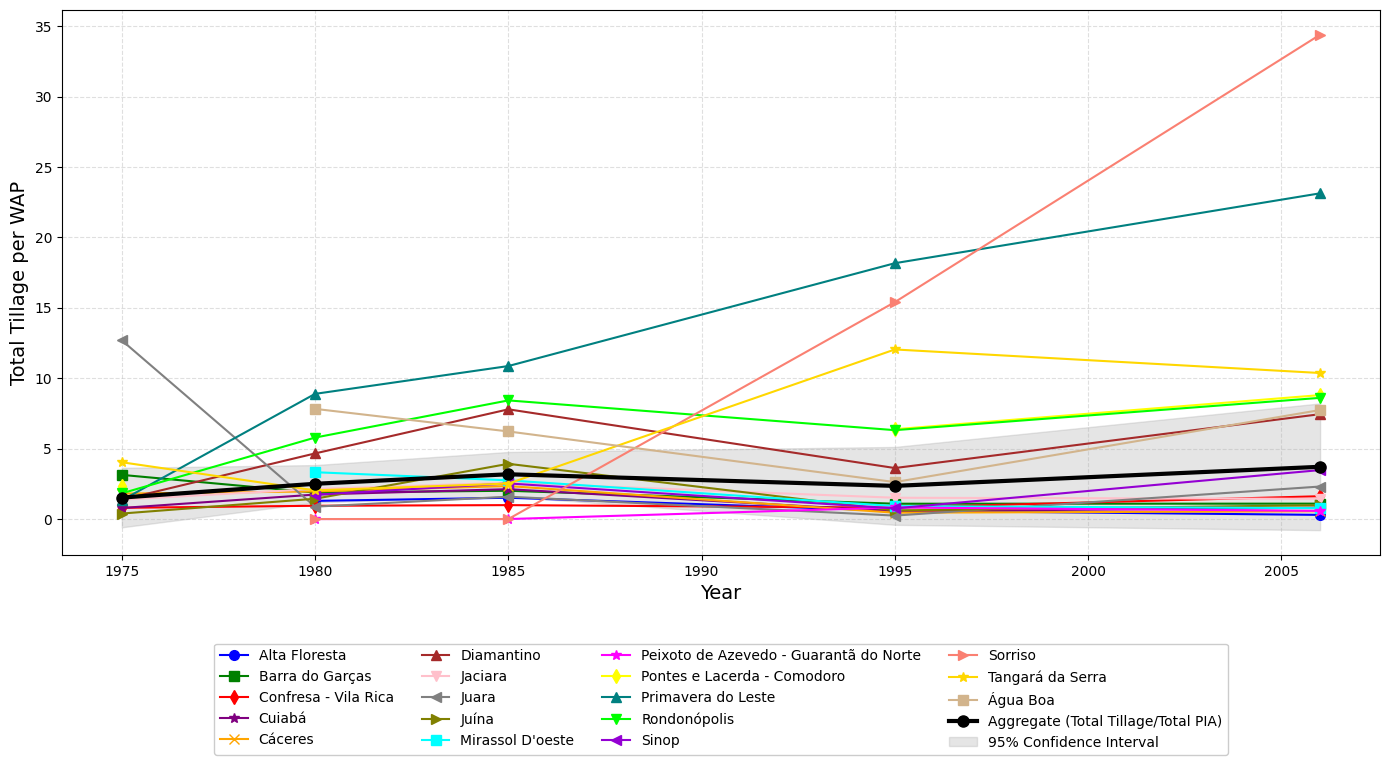


Confidence Interval Values:
Year 1975: CI = 2.1112, Aggregate = 1.5238
Year 1980: CI = 1.3280, Aggregate = 2.5040
Year 1985: CI = 1.5830, Aggregate = 3.1801
Year 1995: CI = 2.7646, Aggregate = 2.3549
Year 2006: CI = 4.4999, Aggregate = 3.7111

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Tillage per PIA.jpg


In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming 'PIA' is a column in your grouped_df
# Calculate Total Tillage per PIA for each region
grouped_df['Tillage_per_PIA'] = grouped_df['Total Tillage'] / grouped_df['PIA'].replace(0, np.nan)

# Calculate Aggregate (sum of Total Tillage / sum of PIA)
annual_totals = grouped_df.groupby('Ano').agg({
    'Total Tillage': 'sum',
    'PIA': 'sum'
}).reset_index()
annual_totals['Aggregate_Tillage_per_PIA'] = annual_totals['Total Tillage'] / annual_totals['PIA']

# Calculate confidence intervals (95%)
conf_intervals = []

for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Tillage_per_PIA']
    year_data = year_data.dropna()  # Filter out NaN values
    n = len(year_data)
    
    if n > 1:
        se = stats.sem(year_data)  # Standard error
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)  # 95% CI
    else:
        if len(conf_intervals) > 0:
            ci = np.mean([c for c in conf_intervals if not np.isnan(c)])
        else:
            ci = 0.2 * year_data.iloc[0] if not year_data.empty else 0
            
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create plot
plt.figure(figsize=(14, 8))

# Get unique regions
regions = sorted(grouped_df['Região imediata'].unique())

# Plot each region with its defined style from region_styles dictionary
for region in regions:
    region_data = grouped_df[grouped_df['Região imediata'] == region]
    
    if region in region_styles:
        color, marker = region_styles[region]
    else:
        color, marker = 'gray', 'o'  # Default
        
    plt.plot(
        region_data['Ano'], 
        region_data['Tillage_per_PIA'], 
        color=color, linestyle='-', linewidth=1.5,
        marker=marker, markersize=7,
        label=region
    )

# Plot Aggregate with confidence interval
plt.plot(
    annual_totals['Ano'], 
    annual_totals['Aggregate_Tillage_per_PIA'],
    color='black', linestyle='-', linewidth=3,
    marker='o', markersize=8,
    label='Aggregate (Total Tillage/Total PIA)'
)

# Handle any NaN confidence intervals
annual_totals['Confidence_Interval'] = annual_totals['Confidence_Interval'].fillna(
    annual_totals['Aggregate_Tillage_per_PIA'] * 0.2  # 20% of value as fallback
)

plt.fill_between(
    annual_totals['Ano'],
    annual_totals['Aggregate_Tillage_per_PIA'] - annual_totals['Confidence_Interval'],
    annual_totals['Aggregate_Tillage_per_PIA'] + annual_totals['Confidence_Interval'],
    color='darkgray', alpha=0.3,
    label='95% Confidence Interval'
)

# Customize plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Tillage per WAP', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.4)

# Create legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), 
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)

# Save the figure
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Tillage per PIA.jpg"
plt.savefig(save_path, dpi=1200, bbox_inches='tight')

plt.show()

# Print info about confidence intervals
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Tillage_per_PIA']:.4f}")

print(f"\nPlot saved to: {save_path}")

In [12]:
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Calculate Production per Annual Investment
grouped_df['Production_per_investment'] = grouped_df['Production'] / grouped_df['Annual Investment '].replace(0, np.nan)

# Calculate Aggregate
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'Annual Investment ': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_investment'] = annual_totals['Production'] / annual_totals['Annual Investment ']

# Calculate confidence intervals
conf_intervals = []
for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_investment'].dropna()
    n = len(year_data)
    
    if n > 1:
        se = stats.sem(year_data)
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)
    else:
        ci = np.mean([c for c in conf_intervals if not np.isnan(c)]) if conf_intervals else 0.2 * year_data.iloc[0] if not year_data.empty else 0
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create interactive plot
fig = go.Figure()

# Store all traces
all_traces = []

# Add region traces (no markers)
for region in sorted(grouped_df['Região imediata'].unique()):
    region_data = grouped_df[grouped_df['Região imediata'] == region].dropna(subset=['Production_per_investment'])
    color, _ = region_styles.get(region, ('gray', 'circle'))
    
    trace = go.Scatter(
        x=region_data['Ano'],
        y=region_data['Production_per_investment'],
        mode='lines',
        name=region,
        line=dict(color=color, width=1.5),
        hovertemplate='<b>%{text}</b><br>Year: %{x}<br>Prod/Invest: %{y:.2f}<extra></extra>',
        text=[region]*len(region_data),
        visible=True
    )
    all_traces.append(trace)

# Add aggregate trace
aggregate_trace = go.Scatter(
    x=annual_totals['Ano'],
    y=annual_totals['Aggregate_Production_per_investment'],
    mode='lines',
    name='Aggregate (Total Prod./Total Investment)',
    line=dict(color='black', width=3),
    hovertemplate='<b>Aggregate</b><br>Year: %{x}<br>Prod/Invest: %{y:.2f}<extra></extra>',
    visible=True
)
all_traces.append(aggregate_trace)

# Add confidence interval
confidence_trace = go.Scatter(
    x=annual_totals['Ano'].tolist() + annual_totals['Ano'].tolist()[::-1],
    y=(annual_totals['Aggregate_Production_per_investment'] + annual_totals['Confidence_Interval']).tolist() + 
      (annual_totals['Aggregate_Production_per_investment'] - annual_totals['Confidence_Interval']).tolist()[::-1],
    fill='toself',
    fillcolor='rgba(169,169,169,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    name='95% Confidence Interval',
    visible=True
)
all_traces.append(confidence_trace)

# Add traces to figure
for trace in all_traces:
    fig.add_trace(trace)

# Create dropdown menu
dropdown_options = [
    {'label': 'All Regions', 'method': 'update', 'args': [{'visible': [True]*len(all_traces)}]},
    {'label': 'Aggregate Only', 'method': 'update', 
     'args': [{'visible': [False]*(len(all_traces)-2) + [True, True]}]}
]

for i, region in enumerate(sorted(grouped_df['Região imediata'].unique())):
    visibility = [False]*len(all_traces)
    visibility[i] = True
    visibility[-2] = True
    visibility[-1] = True
    dropdown_options.append(
        {'label': region, 'method': 'update', 'args': [{'visible': visibility}]}
    )

# Customize layout
fig.update_layout(
    title='Production per Annual Investment by Region',
    xaxis=dict(
        title='Year',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    yaxis=dict(
        title='Production per Annual Investment',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    height=700,
    margin=dict(b=200),
    updatemenus=[{
        'buttons': dropdown_options,
        'direction': 'down',
        'showactive': True,
        'x': 1.1,
        'xanchor': 'right',
        'y': 1.1,
        'yanchor': 'top',
        'bgcolor': 'white'
    }]
)

# Save and show
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production_per_investment_interactive.html"
fig.write_html(save_path)
fig.show()

# Print CI values
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_investment']:.4f}")
print(f"\nPlot saved to: {save_path}")


Confidence Interval Values:
Year 1975: CI = 2.0655, Aggregate = 1.4281
Year 1980: CI = 0.4387, Aggregate = 0.9540
Year 1985: CI = 0.2819, Aggregate = 1.2411
Year 1995: CI = 1.8029, Aggregate = 3.3998
Year 2006: CI = 2.9451, Aggregate = 6.2310

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production_per_investment_interactive.html


In [13]:
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Calculate Production per Total Tillage
grouped_df['Production_per_tillage'] = grouped_df['Production'] / grouped_df['Total Tillage'].replace(0, np.nan)

# Calculate Aggregate
annual_totals = grouped_df.groupby('Ano').agg({
    'Production': 'sum',
    'Total Tillage': 'sum'
}).reset_index()
annual_totals['Aggregate_Production_per_tillage'] = annual_totals['Production'] / annual_totals['Total Tillage']

# Calculate confidence intervals
conf_intervals = []
for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Production_per_tillage'].dropna()
    n = len(year_data)
    
    if n > 1:
        se = stats.sem(year_data)
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)
    else:
        ci = np.mean([c for c in conf_intervals if not np.isnan(c)]) if conf_intervals else 0.2 * year_data.iloc[0] if not year_data.empty else 0
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create interactive plot
fig = go.Figure()

# Store all traces
all_traces = []

# Add region traces (no markers)
for region in sorted(grouped_df['Região imediata'].unique()):
    region_data = grouped_df[grouped_df['Região imediata'] == region].dropna(subset=['Production_per_tillage'])
    color, _ = region_styles.get(region, ('gray', 'circle'))
    
    trace = go.Scatter(
        x=region_data['Ano'],
        y=region_data['Production_per_tillage'],
        mode='lines',
        name=region,
        line=dict(color=color, width=1.5),
        hovertemplate='<b>%{text}</b><br>Year: %{x}<br>Prod/Tillage: %{y:.2f}<extra></extra>',
        text=[region]*len(region_data),
        visible=True
    )
    all_traces.append(trace)

# Add aggregate trace
aggregate_trace = go.Scatter(
    x=annual_totals['Ano'],
    y=annual_totals['Aggregate_Production_per_tillage'],
    mode='lines',
    name='Aggregate (Total Prod./Total Tillage)',
    line=dict(color='black', width=3),
    hovertemplate='<b>Aggregate</b><br>Year: %{x}<br>Prod/Tillage: %{y:.2f}<extra></extra>',
    visible=True
)
all_traces.append(aggregate_trace)

# Add confidence interval
confidence_trace = go.Scatter(
    x=annual_totals['Ano'].tolist() + annual_totals['Ano'].tolist()[::-1],
    y=(annual_totals['Aggregate_Production_per_tillage'] + annual_totals['Confidence_Interval']).tolist() + 
      (annual_totals['Aggregate_Production_per_tillage'] - annual_totals['Confidence_Interval']).tolist()[::-1],
    fill='toself',
    fillcolor='rgba(169,169,169,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    name='95% Confidence Interval',
    visible=True
)
all_traces.append(confidence_trace)

# Add traces to figure
for trace in all_traces:
    fig.add_trace(trace)

# Create dropdown menu
dropdown_options = [
    {'label': 'All Regions', 'method': 'update', 'args': [{'visible': [True]*len(all_traces)}]},
    {'label': 'Aggregate Only', 'method': 'update', 
     'args': [{'visible': [False]*(len(all_traces)-2) + [True, True]}]}
]

for i, region in enumerate(sorted(grouped_df['Região imediata'].unique())):
    visibility = [False]*len(all_traces)
    visibility[i] = True
    visibility[-2] = True
    visibility[-1] = True
    dropdown_options.append(
        {'label': region, 'method': 'update', 'args': [{'visible': visibility}]}
    )

# Customize layout
fig.update_layout(
    title='Production per Total Tillage by Region',
    xaxis=dict(
        title='Year',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    yaxis=dict(
        title='Production per Total Tillage',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    height=700,
    margin=dict(b=200),
    updatemenus=[{
        'buttons': dropdown_options,
        'direction': 'down',
        'showactive': True,
        'x': 1.1,
        'xanchor': 'right',
        'y': 1.1,
        'yanchor': 'top',
        'bgcolor': 'white'
    }]
)

# Save and show
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production_per_tillage_interactive.html"
fig.write_html(save_path)
fig.show()

# Print CI values
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Production_per_tillage']:.4f}")
print(f"\nPlot saved to: {save_path}")


Confidence Interval Values:
Year 1975: CI = 1.4666, Aggregate = 3.5658
Year 1980: CI = 0.6370, Aggregate = 1.5166
Year 1985: CI = 0.5011, Aggregate = 1.8588
Year 1995: CI = 0.3217, Aggregate = 1.4965
Year 2006: CI = 0.2846, Aggregate = 1.7027

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Production_per_tillage_interactive.html


In [14]:
import plotly.graph_objects as go
import numpy as np
from scipy import stats

# Calculate Tillage per PIA
grouped_df['Tillage_per_PIA'] = grouped_df['Total Tillage'] / grouped_df['PIA'].replace(0, np.nan)

# Calculate Aggregate
annual_totals = grouped_df.groupby('Ano').agg({
    'Total Tillage': 'sum',
    'PIA': 'sum'
}).reset_index()
annual_totals['Aggregate_Tillage_per_PIA'] = annual_totals['Total Tillage'] / annual_totals['PIA']

# Calculate confidence intervals
conf_intervals = []
for year in annual_totals['Ano']:
    year_data = grouped_df[grouped_df['Ano'] == year]['Tillage_per_PIA'].dropna()
    n = len(year_data)
    
    if n > 1:
        se = stats.sem(year_data)
        ci = se * stats.t.ppf((1 + 0.95) / 2, n-1)
    else:
        ci = np.mean([c for c in conf_intervals if not np.isnan(c)]) if conf_intervals else 0.2 * year_data.iloc[0] if not year_data.empty else 0
    conf_intervals.append(ci)

annual_totals['Confidence_Interval'] = conf_intervals

# Create interactive plot
fig = go.Figure()

# Store all traces
all_traces = []

# Add region traces (no markers)
for region in sorted(grouped_df['Região imediata'].unique()):
    region_data = grouped_df[grouped_df['Região imediata'] == region].dropna(subset=['Tillage_per_PIA'])
    color, _ = region_styles.get(region, ('gray', 'circle'))
    
    trace = go.Scatter(
        x=region_data['Ano'],
        y=region_data['Tillage_per_PIA'],
        mode='lines',
        name=region,
        line=dict(color=color, width=1.5),
        hovertemplate='<b>%{text}</b><br>Year: %{x}<br>Tillage/WAP: %{y:.2f}<extra></extra>',
        text=[region]*len(region_data),
        visible=True
    )
    all_traces.append(trace)

# Add aggregate trace
aggregate_trace = go.Scatter(
    x=annual_totals['Ano'],
    y=annual_totals['Aggregate_Tillage_per_PIA'],
    mode='lines',
    name='Aggregate (Total Tillage/Total WAP)',
    line=dict(color='black', width=3),
    hovertemplate='<b>Aggregate</b><br>Year: %{x}<br>Tillage/WAP: %{y:.2f}<extra></extra>',
    visible=True
)
all_traces.append(aggregate_trace)

# Add confidence interval
confidence_trace = go.Scatter(
    x=annual_totals['Ano'].tolist() + annual_totals['Ano'].tolist()[::-1],
    y=(annual_totals['Aggregate_Tillage_per_PIA'] + annual_totals['Confidence_Interval']).tolist() + 
      (annual_totals['Aggregate_Tillage_per_PIA'] - annual_totals['Confidence_Interval']).tolist()[::-1],
    fill='toself',
    fillcolor='rgba(169,169,169,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    name='95% Confidence Interval',
    visible=True
)
all_traces.append(confidence_trace)

# Add traces to figure
for trace in all_traces:
    fig.add_trace(trace)

# Create dropdown menu
dropdown_options = [
    {'label': 'All Regions', 'method': 'update', 'args': [{'visible': [True]*len(all_traces)}]},
    {'label': 'Aggregate Only', 'method': 'update', 
     'args': [{'visible': [False]*(len(all_traces)-2) + [True, True]}]}
]

for i, region in enumerate(sorted(grouped_df['Região imediata'].unique())):
    visibility = [False]*len(all_traces)
    visibility[i] = True
    visibility[-2] = True
    visibility[-1] = True
    dropdown_options.append(
        {'label': region, 'method': 'update', 'args': [{'visible': visibility}]}
    )

# Customize layout
fig.update_layout(
    title='Total Tillage per Working-Age Population by Region',
    xaxis=dict(
        title='Year',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    yaxis=dict(
        title='Total Tillage per WAP',
        showgrid=True,
        gridcolor='rgba(200,200,200,0.5)',
        gridwidth=1,
        zerolinecolor='rgba(200,200,200,0.5)'
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=-0.5,
        xanchor='center',
        x=0.5
    ),
    height=700,
    margin=dict(b=200),
    updatemenus=[{
        'buttons': dropdown_options,
        'direction': 'down',
        'showactive': True,
        'x': 1.1,
        'xanchor': 'right',
        'y': 1.1,
        'yanchor': 'top',
        'bgcolor': 'white'
    }]
)

# Save and show
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Tillage_per_PIA_interactive.html"
fig.write_html(save_path)
fig.show()

# Print CI values
print("\nConfidence Interval Values:")
for i, row in annual_totals.iterrows():
    print(f"Year {int(row['Ano'])}: CI = {row['Confidence_Interval']:.4f}, Aggregate = {row['Aggregate_Tillage_per_PIA']:.4f}")
print(f"\nPlot saved to: {save_path}")


Confidence Interval Values:
Year 1975: CI = 2.1112, Aggregate = 1.5238
Year 1980: CI = 1.3280, Aggregate = 2.5040
Year 1985: CI = 1.5830, Aggregate = 3.1801
Year 1995: CI = 2.7646, Aggregate = 2.3549
Year 2006: CI = 4.4999, Aggregate = 3.7111

Plot saved to: C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\Tillage_per_PIA_interactive.html


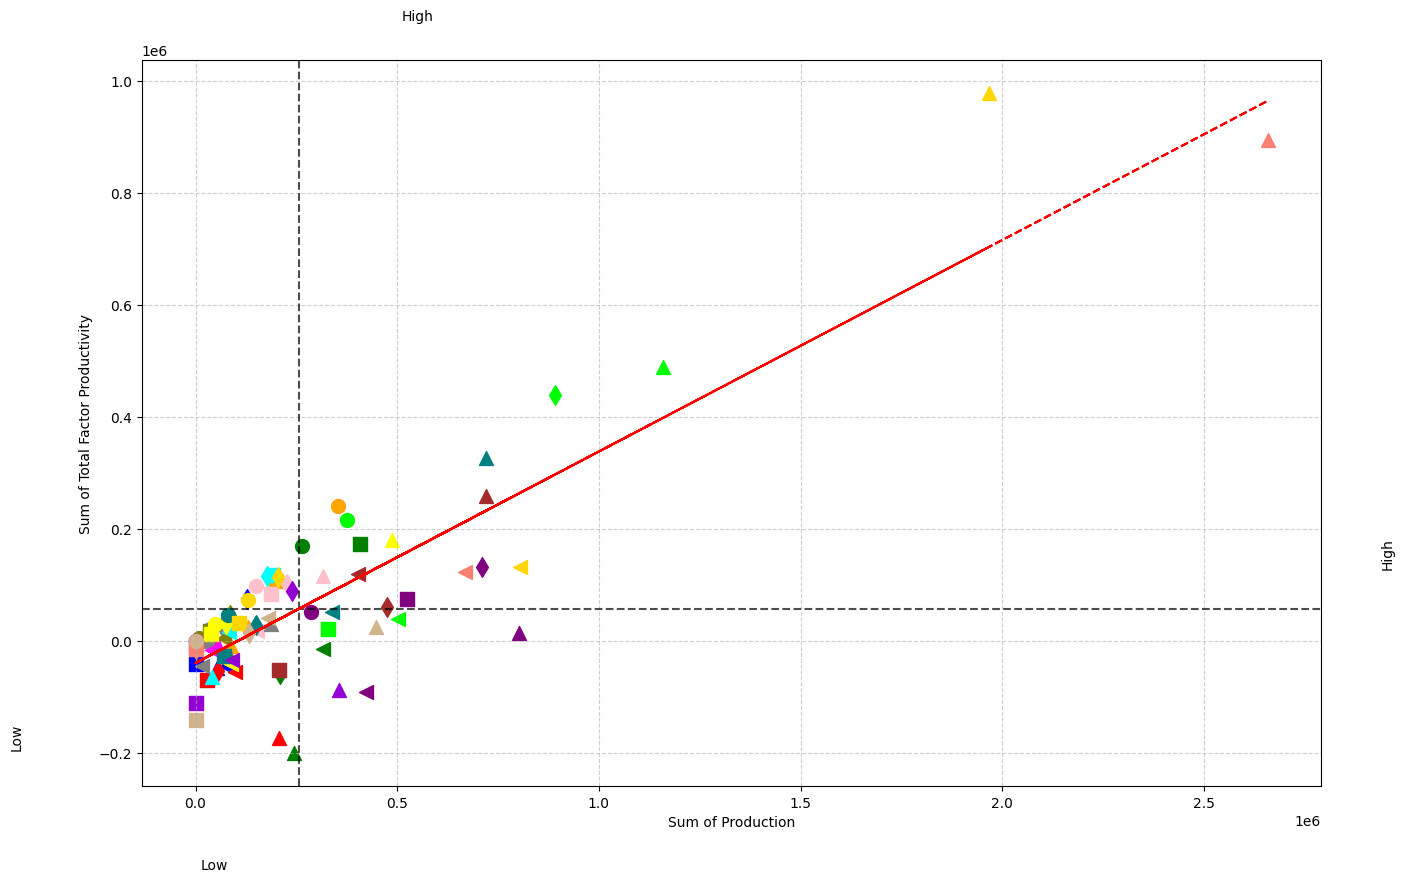

Aggregated scatter plot for specific years with quadrants saved to: Aggregated_TFP_vs_Production_Specific_Years_Quadrants_No_Legend.png
Legend for the plot with quadrants saved separately to: Aggregated_TFP_vs_Production_Specific_Years_Quadrants_Legend.png


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D


# Define the specific years to aggregate
selected_years = [1975, 1980, 1985, 1995, 2006]

# Filter the DataFrame for the selected years
filtered_df = grouped_df[grouped_df['Ano'].isin(selected_years)]

# Aggregate 'TFP' and 'Production' by 'Região imediata' for the selected years
aggregated_selected_years = filtered_df.groupby(['Região imediata', 'Ano']).agg(
    TFP_Sum=('TFP', 'sum'),
    Production_Sum=('Production', 'sum')
).reset_index()

# Define a dictionary for unique color and marker combinations for all regions
region_styles = {
    'Alta Floresta': 'blue',
    'Barra do Garças': 'green',
    'Confresa - Vila Rica': 'red',
    'Cuiabá': 'purple',
    'Cáceres': 'orange',
    'Diamantino': 'brown',
    'Jaciara': 'pink',
    'Juara': 'gray',
    'Juína': 'olive',
    'Mirassol D\'oeste': 'cyan',
    'Peixoto de Azevedo - Guarantã do Norte': 'magenta',
    'Pontes e Lacerda - Comodoro': 'yellow',
    'Primavera do Leste': 'teal',
    'Rondonópolis': 'lime',
    'Sinop': 'darkviolet',
    'Sorriso': 'salmon',
    'Tangará da Serra': 'gold',
    'Água Boa': 'tan'
}

# Define a dictionary for markers for each year
year_markers = {
    1975: 'o',
    1980: 's',
    1985: 'd',
    1995: '<',
    2006: '^'
}

# Calculate the mean values for TFP and Production to define quadrants
tfp_mean = aggregated_selected_years['TFP_Sum'].mean()
production_mean = aggregated_selected_years['Production_Sum'].mean()

# Create the scatter plot
plt.figure(figsize=(14, 10))

for index, row in aggregated_selected_years.iterrows():
    region = row['Região imediata']
    year = row['Ano']
    tfp_sum = row['TFP_Sum']
    production_sum = row['Production_Sum']
    color = region_styles.get(region, 'gray')
    marker = year_markers.get(year, 'o')

    plt.scatter(production_sum, tfp_sum, color=color, marker=marker, s=100, label=f'{region} ({year})')

# Add lines to demarcate quadrants
plt.axvline(x=production_mean, color='k', linestyle='--', alpha=0.7)
plt.axhline(y=tfp_mean, color='k', linestyle='--', alpha=0.7)

# Add labels for the quadrants
# plt.text(production_mean * 1.1, tfp_mean * 1.1, 'High TFP, High Production', fontsize=12, alpha=0.8)
# plt.text(production_mean * 1.1, tfp_mean * 0.9, 'Low TFP, High Production', fontsize=12, alpha=0.8)
# plt.text(production_mean * 0.9, tfp_mean * 1.1, 'High TFP, Low Production', fontsize=12, alpha=0.8, ha='right')
# plt.text(production_mean * 0.9, tfp_mean * 0.9, 'Low TFP, Low Production', fontsize=12, alpha=0.8, ha='right')

# Add "Low" and "High" labels on the axes
x_low = plt.xlim()[0] + (plt.xlim()[1] - plt.xlim()[0]) * 0.05
x_high = production_mean + (plt.xlim()[1] - production_mean) * 0.1
y_low = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05
y_high = tfp_mean + (plt.ylim()[1] - tfp_mean) * 0.1

plt.text(x_low, plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1, 'Low', ha='left', va='top', fontsize=10)
plt.text(x_high, plt.ylim()[1] + (plt.ylim()[1] - plt.ylim()[0]) * 0.05, 'High', ha='left', va='bottom', fontsize=10)
plt.text(plt.xlim()[0] - (plt.xlim()[1] - plt.xlim()[0]) * 0.1, y_low, 'Low', ha='right', va='bottom', rotation=90, fontsize=10)
plt.text(plt.xlim()[1] + (plt.xlim()[1] - plt.xlim()[0]) * 0.05, y_high, 'High', ha='left', va='center', rotation=90, fontsize=10)

# Add line of best fit
x = aggregated_selected_years['Production_Sum']
y = aggregated_selected_years['TFP_Sum']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
plt.plot(x, polynomial(x), 'r--', label='Line of Best Fit')


plt.xlabel('Sum of Production')
plt.ylabel('Sum of Total Factor Productivity')
plt.grid(True, linestyle='--', alpha=0.6)

# Create a more readable legend, placed at the bottom
legend_handles = []
legend_labels = []
for (region, year) in aggregated_selected_years[['Região imediata', 'Ano']].drop_duplicates().values:
    color = region_styles.get(region, 'gray')
    marker = year_markers.get(year, 'o')
    label = f'{region} ({year})'
    legend_handles.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, markersize=8))
    legend_labels.append(label)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to make space for the overall title

# Save the plot with quadrants and without the main legend
save_path_scatter_quadrants_no_legend = "Aggregated_TFP_vs_Production_Specific_Years_Quadrants_No_Legend.png"
plt.savefig(save_path_scatter_quadrants_no_legend, dpi=300, bbox_inches='tight')
plt.show()

# Create the legend separately
fig_legend, ax_legend = plt.subplots(figsize=(10, 8))
ax_legend.legend(handles=legend_handles, labels=legend_labels,
                        title='Região Imediata (Year)',
                        loc='center',
                        ncol=5,
                        fancybox=True,
                        shadow=True,
                        framealpha=0.8)
ax_legend.axis('off')
save_path_legend_quadrants = "Aggregated_TFP_vs_Production_Specific_Years_Quadrants_Legend.png"
plt.savefig(save_path_legend_quadrants, dpi=300, bbox_inches='tight')
plt.close(fig_legend)

print(f"Aggregated scatter plot for specific years with quadrants saved to: {save_path_scatter_quadrants_no_legend}")
print(f"Legend for the plot with quadrants saved separately to: {save_path_legend_quadrants}")



In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For this example, let's assume we have the grouped_df
# If you don't have the dataframe ready, you'll need to load it first
# grouped_df = pd.read_csv('your_data.csv')

# Define the specific years to aggregate
selected_years = [1975, 1980, 1985, 1995, 2006]

# Filter the DataFrame for the selected years
filtered_df = grouped_df[grouped_df['Ano'].isin(selected_years)]

# Aggregate 'TFP' and 'Production' by 'Região imediata' for the selected years
aggregated_selected_years = filtered_df.groupby(['Região imediata', 'Ano']).agg(
    TFP_Sum=('TFP', 'sum'),
    Production_Sum=('Production', 'sum')
).reset_index()

# Calculate the mean values for TFP and Production to define quadrants
tfp_mean = aggregated_selected_years['TFP_Sum'].mean()
production_mean = aggregated_selected_years['Production_Sum'].mean()

# Create dictionary for pretty quadrant names
quadrant_names = {
    (True, True): "High TFP, High Production",
    (True, False): "High TFP, Low Production",
    (False, True): "Low TFP, High Production",
    (False, False): "Low TFP, Low Production"
}

# Add quadrant information to the dataframe
aggregated_selected_years['Quadrant'] = aggregated_selected_years.apply(
    lambda x: quadrant_names[(x['TFP_Sum'] > tfp_mean, x['Production_Sum'] > production_mean)],
    axis=1
)

# Fit a trend line
x = aggregated_selected_years['Production_Sum']
y = aggregated_selected_years['TFP_Sum']
coefficients = np.polyfit(x, y, 1)
trend_x = np.linspace(min(x), max(x), 100)
trend_y = coefficients[0] * trend_x + coefficients[1]

# Create a figure
fig = go.Figure()

# Define marker symbols for each year
year_symbols = {
    1975: 'circle',
    1980: 'square',
    1985: 'diamond',
    1995: 'cross',
    2006: 'triangle-up'
}

# Add traces for each region and year combination
for region in aggregated_selected_years['Região imediata'].unique():
    region_data = aggregated_selected_years[aggregated_selected_years['Região imediata'] == region]

    for year in selected_years:
        year_data = region_data[region_data['Ano'] == year]

        if not year_data.empty:
            fig.add_trace(go.Scatter(
                x=year_data['Production_Sum'],
                y=year_data['TFP_Sum'],
                mode='markers',
                marker=dict(
                    size=12,
                    symbol=year_symbols[year],  # Use different symbols for years
                    line=dict(width=1, color='DarkSlateGrey')
                ),
                name=region,
                legendgroup=region,
                showlegend=False,  # Don't show in legend - we'll create custom legends
                hovertemplate='<b>Region:</b> %{text}<br><b>Year:</b> ' + str(year) +
                            '<br><b>Production:</b> %{x}<br><b>TFP:</b> %{y}' +
                            '<br><b>Quadrant:</b> ' + year_data['Quadrant'].values[0] if not year_data.empty else '',
                text=[region] * len(year_data)
            ))

# Set figure size and title
fig.update_layout(
    height=800,
    width=1000,
    title='Total Factor Productivity vs Production by Region and Year',
    xaxis_title='Sum of Production',
    yaxis_title='Sum of Total Factor Productivity'
)

# Create a custom legend for regions (colors)
for i, region in enumerate(sorted(aggregated_selected_years['Região imediata'].unique())):
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(
            size=12,
            color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)],
            symbol='circle'
        ),
        legendgroup=region,
        name=region,
        showlegend=True
    ))

# Create a custom legend for years (symbols)
for year in selected_years:
    fig.add_trace(go.Scatter(
        x=[None],
        y=[None],
        mode='markers',
        marker=dict(
            size=12,
            color='black',
            symbol=year_symbols[year]  # Use different symbols for years
        ),
        legendgroup='year',
        name=f'Year: {year}',
        showlegend=True
    ))

# Apply colors to the actual data points for each region
for i, trace in enumerate(fig.data[:len(aggregated_selected_years)]):
    region = trace.text[0] if hasattr(trace, 'text') and trace.text else ""
    region_index = list(sorted(aggregated_selected_years['Região imediata'].unique())).index(region) if region in aggregated_selected_years['Região imediata'].unique() else i
    trace.marker.color = px.colors.qualitative.Plotly[region_index % len(px.colors.qualitative.Plotly)]

# Add trend line
x = aggregated_selected_years['Production_Sum']
y = aggregated_selected_years['TFP_Sum']
coefficients = np.polyfit(x, y, 1)
trend_x = np.linspace(min(x), max(x), 100)
trend_y = coefficients[0] * trend_x + coefficients[1]

fig.add_trace(
    go.Scatter(
        x=trend_x,
        y=trend_y,
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Trend Line',
        showlegend=True
    )
)

# Add quadrant lines
fig.add_shape(
    type='line', x0=production_mean, y0=min(y), x1=production_mean, y1=max(y),
    line=dict(color='black', width=1, dash='dash')
)
fig.add_shape(
    type='line', x0=min(x), y0=tfp_mean, x1=max(x), y1=tfp_mean,
    line=dict(color='black', width=1, dash='dash')
)

# Update layout for legend below y-axis title in a single line
fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,  # Adjusted position:  Further down
        xanchor="center",
        x=0.5,  # Center the legend
        itemsizing='constant',
        groupclick="toggleitem",
        title=dict(text=''),
        itemclick="toggle",
        traceorder="normal",
        font=dict(size=10),  # Smaller font to fit in one line
    ),
    margin=dict(l=80, r=80, t=120, b=120),  # Increased bottom margin for legend
    plot_bgcolor='rgba(240, 240, 240, 0.8)',
    hovermode='closest',
    xaxis=dict(
        showgrid=True,
        gridcolor='rgba(200, 200, 200, 0.3)',
        zeroline=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='rgba(200, 200, 200, 0.3)',
        zeroline=False
    )
)

# Add buttons to filter by year
year_buttons = [dict(
    label="All Years",
    method="update",
    args=[{"visible": [True] * len(fig.data)}, {"title": "All Years"}]
)]

# Get indices of actual data traces (not legend-only traces)
data_trace_count = len(aggregated_selected_years)
total_traces = len(fig.data)
legend_trace_count = total_traces - data_trace_count

# Create a button for each year
for year in selected_years:
    # Create visibility array
    visible = []

    # For each trace, determine if it should be visible
    for i in range(total_traces):
        # Always keep legend traces visible
        if i >= data_trace_count:
            visible.append(True)
        else:
            # For data traces, check if they match the current year
            year_match = aggregated_selected_years.iloc[i]['Ano'] == year if i < len(aggregated_selected_years) else False
            visible.append(year_match)

    year_buttons.append(dict(
        label=str(year),
        method="update",
        args=[{"visible": visible}, {"title": f"Year: {year}"}]
    ))

# Add the buttons to the layout
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        x=1.02,
        y=1.15,
        showactive=True,
        buttons=year_buttons
    )]
)

# No range slider
fig.update_layout(
    xaxis=dict(
        type="linear"
    )
)

# Show the figure
fig.show()

# To save as an HTML file that can be opened in any browser
fig.write_html("TFP_vs_Production_Interactive.html")

print("Interactive plot created and saved as TFP_vs_Production_Interactive.html")



Interactive plot created and saved as TFP_vs_Production_Interactive.html


Static plot created and saved as C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\TFP_by_Region_Static_Plot.jpg


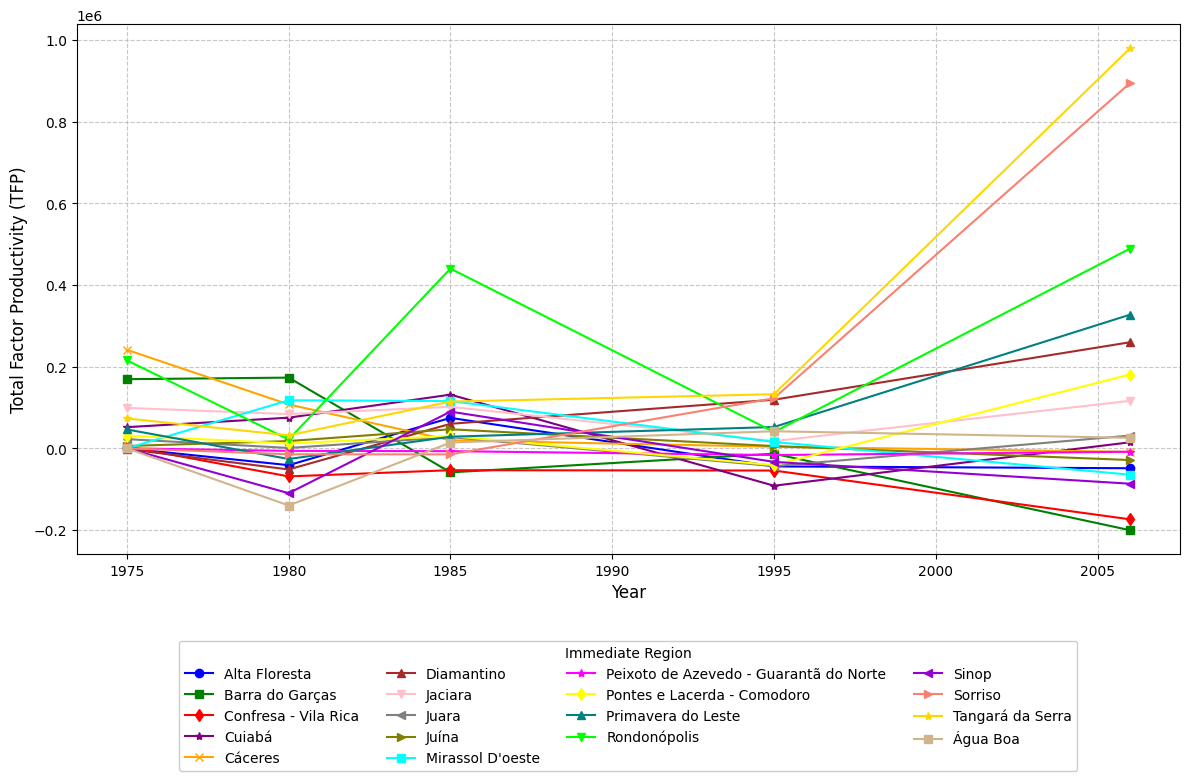

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define the regions and their corresponding colors and markers
region_styles = {
    'Alta Floresta': ('blue', 'o'),
    'Barra do Garças': ('green', 's'),
    'Confresa - Vila Rica': ('red', 'd'),
    'Cuiabá': ('purple', '*'),
    'Cáceres': ('orange', 'x'),
    'Diamantino': ('brown', '^'),
    'Jaciara': ('pink', 'v'),
    'Juara': ('gray', '<'),
    'Juína': ('olive', '>'),
    'Mirassol D\'oeste': ('cyan', 's'),
    'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),
    'Pontes e Lacerda - Comodoro': ('yellow', 'd'),
    'Primavera do Leste': ('teal', '^'),
    'Rondonópolis': ('lime', 'v'),
    'Sinop': ('darkviolet', '<'),
    'Sorriso': ('salmon', '>'),
    'Tangará da Serra': ('gold', '*'),
    'Água Boa': ('tan', 's')
}

# Create the static line plot for TFP by region over the years
plt.figure(figsize=(12, 8))

# Iterate through each region and plot the line with specified color and marker
for region, (color, marker) in region_styles.items():
    # Filter data for the current region
    region_data = filtered_df[filtered_df['Região imediata'] == region]
    if not region_data.empty:
        plt.plot(region_data['Ano'], region_data['TFP'],
                 label=region, color=color, marker=marker, linestyle='-')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Factor Productivity (TFP)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Updated the legend style based on your provided code
plt.legend(title='Immediate Region', loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=4, fontsize=10, framealpha=1)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.subplots_adjust(bottom=0.3) # Make room for the legend at the bottom

# Define the save path
save_path = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\TFP_by_Region_Static_Plot.jpg"

# Save the plot to the specified path with 1200 dpi
# IMPORTANT: Save the figure BEFORE showing it
plt.savefig(save_path, dpi=1200)
print(f"Static plot created and saved as {save_path}")

# Display the plot
plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# Define the regions and their corresponding colors and markers
# IMPORTANT: Ensure each value in this dictionary is a tuple with EXACTLY two elements (color, marker).
region_styles = {
    'Alta Floresta': ('blue', 'o'),
    'Barra do Garças': ('green', 's'),
    'Confresa - Vila Rica': ('red', 'd'),
    'Cuiabá': ('purple', '*'),
    'Cáceres': ('orange', 'x'),
    'Diamantino': ('brown', '^'),
    'Jaciara': ('pink', 'v'),
    'Juara': ('gray', '<'),
    'Juína': ('olive', '>'),
    'Mirassol D\'oeste': ('cyan', 's'),
    'Peixoto de Azevedo - Guarantã do Norte': ('magenta', '*'),
    'Pontes e Lacerda - Comodoro': ('yellow', 'd'),
    'Primavera do Leste': ('teal', '^'),
    'Rondonópolis': ('lime', 'v'),
    'Sinop': ('darkviolet', '<'),
    'Sorriso': ('salmon', '>'),
    'Tangará da Serra': ('gold', '*'),
    'Água Boa': ('tan', 's')
}

# Create color and symbol maps for Plotly from region_styles
# Plotly expects specific marker symbols, so we map Matplotlib markers to Plotly equivalents where necessary.
# For example, 'o' is 'circle', 's' is 'square', '*' is 'star', 'd' is 'diamond', 'x' is 'x', '^' is 'triangle-up',
# 'v' is 'triangle-down', '<' is 'triangle-left', '>' is 'triangle-right'.
plotly_marker_map = {
    'o': 'circle', 's': 'square', 'd': 'diamond', '*': 'star', 'x': 'x',
    '^': 'triangle-up', 'v': 'triangle-down', '<': 'triangle-left', '>': 'triangle-right'
}

color_map = {region: style[0] for region, style in region_styles.items()}
symbol_map = {region: plotly_marker_map.get(style[1], 'circle') for region, style in region_styles.items()}


# Create the interactive line plot for TFP by region over the years
fig = px.line(filtered_df,
              x='Ano',
              y='TFP',
              color='Região imediata',
              line_group='Região imediata', # Ensures separate lines for each region
              markers=True,
              color_discrete_map=color_map,
              symbol='Região imediata', # Map symbols to regions
              symbol_map=symbol_map, # Use the custom symbol map
              title=None # Removed the title as requested previously
             )

# Customize layout
fig.update_layout(
    title='Total Factor Productivity (TFP) by Region Over Time', # Added plot title
    xaxis_title='Year',
    yaxis_title='Total Factor Productivity (TFP)',
    showlegend=True,
    legend_title_text='Immediate Region',
    # Adjust legend position similar to matplotlib's bbox_to_anchor
    legend=dict(
        orientation="h", # Horizontal legend
        yanchor="bottom",
        y=-0.4, # Adjusted to be lower
        xanchor="center",
        x=0.5,
        font=dict(size=10),
        traceorder="normal", # Keeps legend items in order of appearance
        bgcolor="rgba(255,255,255,1)", # White background for framealpha=1
        bordercolor="Black", # Optional border for clarity
        borderwidth=0 # No border for framealpha=1
    ),
    margin=dict(b=200), # Increased bottom margin to make space for the legend and dropdown
    plot_bgcolor='white', # Set plot background to white
    paper_bgcolor='white' # Set paper background to white
)

# Add dropdown menu for region selection
regions_in_data = sorted(filtered_df['Região imediata'].unique())
buttons = []

# "All Regions" button
buttons.append(
    dict(
        label="All Regions",
        method="update",
        args=[{"visible": [True] * len(fig.data)}, # Show all traces
              {"title": "Total Factor Productivity for Immediate Region"}] # Set title for "All Regions"
    )
)

# Buttons for individual regions
for i, region in enumerate(regions_in_data):
    visibility = [False] * len(fig.data)
    # Find the index of the trace corresponding to the current region
    # This assumes the order of traces in fig.data matches the order of regions when px.line was created.
    # If not, a more robust mapping would be needed.
    trace_index = [j for j, trace in enumerate(fig.data) if trace.name == region]
    if trace_index:
        visibility[trace_index[0]] = True # Set only this region's trace to visible

    buttons.append(
        dict(
            label=region,
            method="update",
            args=[{"visible": visibility},
                  {"title": f"Total Factor Productivity (TFP) for {region}"}] # Set title for selected region
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            x=0.5, # Position dropdown in the middle
            xanchor="center", # Anchor the x position to the center of the dropdown
            y=1.15, # Position above the plot
            showactive=True,
            buttons=buttons
        )
    ]
)


# Show the plot (this will open in your default browser if run locally)
fig.show()

# Save the plot to an HTML file
save_path_html = r"C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\TFP_by_Region_Interactive_Plot.html"
fig.write_html(save_path_html)
print(f"Interactive plot created and saved as {save_path_html}")

Interactive plot created and saved as C:\Users\daves\OneDrive\Pessoal\Acadêmico\Mestrado\Dissertação - Execução\Dissertação\Quadros e gráficos\TFP_by_Region_Interactive_Plot.html
